In [1]:
import os
import chardet
import pandas as pd
import numpy as np
import json
import glob


In [37]:
# instantiating lists for separating grids by day
grids = []
mon_list = []
tue_list = []
wed_list = []
thu_list = []
fri_list = []
sat_list = []
sun_list = []

# creating dict to sort the puzzles by day of the week (dow)
dow_dict={
    "monday":mon_list,
    "tuesday":tue_list,
    "wednesday":wed_list,
    "thursday":thu_list,
    "friday":fri_list,
    "saturday":sat_list,
    "sunday":sun_list
}

for fpath in glob.glob(pathname="../data/json/*/*/*.json",recursive=True):
    with open(fpath,'r') as cw:
        try:
            cw_json = json.JSONDecoder().decode(cw.readline())
            dow = cw_json['dow'].lower()
            dow_dict[dow] = dow_dict[dow] + [cw_json['grid']]

            # grids = grids + [cw_json['grid']] # get all grids
        except(json.JSONDecodeError):
            print('uh oh')

# raw_grids = grids.copy()




for fpath in glob.glob(pathname="../data/json/*/*/*.json",recursive=True):
    with open(fpath,'r') as cw:
        try:
            cw_json = json.JSONDecoder().decode(cw.readline())
            grids = grids + [cw_json['grid']] # get all grids
        except(json.JSONDecodeError):
            print('uh oh')

raw_grids = grids.copy()


uh oh
uh oh
uh oh
uh oh


[['A',
  'L',
  'S',
  'O',
  '.',
  '.',
  'P',
  'A',
  'C',
  'K',
  '.',
  'G',
  'A',
  'R',
  'B',
  'L',
  'E',
  'T',
  'U',
  'P',
  '.',
  'I',
  'L',
  'L',
  'E',
  '.',
  'I',
  'S',
  'A',
  'R',
  'O',
  'N',
  'A',
  'I',
  'R',
  '.',
  'P',
  'L',
  'A',
  'N',
  '.',
  'V',
  'I',
  'N',
  'E',
  'W',
  'A',
  'Y',
  'S',
  'I',
  'D',
  'E',
  'I',
  'N',
  'N',
  '.',
  'E',
  'D',
  'I',
  'T',
  '.',
  '.',
  '.',
  '.',
  'D',
  'A',
  'R',
  'N',
  '.',
  'E',
  'S',
  'S',
  'E',
  'N',
  '.',
  'D',
  'O',
  'W',
  'S',
  'E',
  'R',
  '.',
  '.',
  'B',
  'L',
  'O',
  'W',
  '.',
  '.',
  '.',
  'A',
  'L',
  'O',
  'E',
  '.',
  'T',
  'A',
  'C',
  'O',
  '.',
  'R',
  'A',
  'T',
  'T',
  'Y',
  'S',
  'I',
  'R',
  'E',
  'D',
  '.',
  'G',
  'U',
  'N',
  '.',
  'E',
  'Y',
  'R',
  'I',
  'E',
  'H',
  'O',
  'N',
  'O',
  'R',
  '.',
  'R',
  'E',
  'E',
  'F',
  '.',
  'T',
  'A',
  'R',
  'A',
  '.',
  '.',
  '.',
  'N',
  'A',
  'P',
  'A',
  '.',

In [3]:
# CONSTANTS FOR THE SIZE OF STANDARD SIZE GRIDS (15X15) AS WELL AS THE LARGER SUNDAY GRIDS (21X21)
GRID_DIM = 15
SUNDAY_GRID_DIM = 21

GRID_SHAPE = (GRID_DIM,GRID_DIM)
SUNDAY_GRID_SHAPE = (SUNDAY_GRID_DIM,SUNDAY_GRID_DIM)




In [4]:
#  if a square is empty, 0.  If a square is black, 1.
binary_grids = []
for grid in raw_grids:
    new_grid = [1 if x == "." else 0 for x in grid ]
    binary_grids = binary_grids + [new_grid]

grids = binary_grids

In [5]:
# converting 1d grids to n x n numpy arrays
sunday_grids = [np.array(grid).reshape(SUNDAY_GRID_SHAPE) for grid in grids if len(grid) == SUNDAY_GRID_DIM * SUNDAY_GRID_DIM]
normal_grids = [np.array(grid).reshape(GRID_SHAPE) for grid in grids if len(grid) == GRID_DIM * GRID_DIM]


In [6]:
# summing all arrays to generate heatmaps
# normal_grids_sum = np.zeros(GRID_SHAPE)
# normal_grids_sum = normal_grids_sum + normal_grids

# sunday_grids_sum = np.zeros(SUNDAY_GRID_SHAPE)
normal_grids_sum = np.sum(normal_grids, axis=0)
sunday_grids_sum = np.sum(sunday_grids, axis=0)

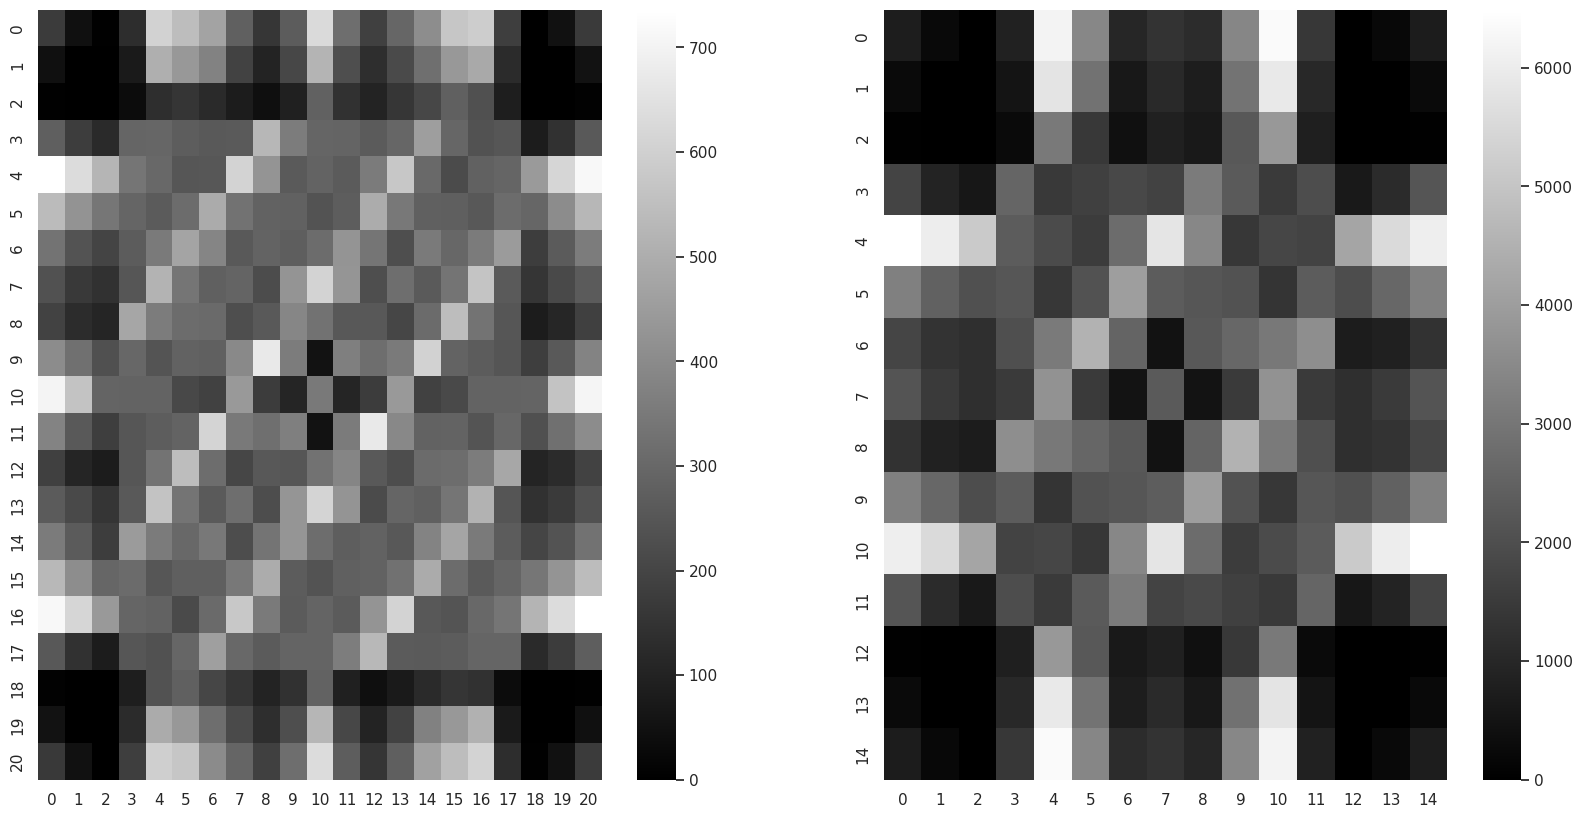

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

_, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10));
sns.heatmap(normal_grids_sum, ax=ax2,cmap="binary_r");
sns.heatmap(sunday_grids_sum, ax=ax1,cmap="binary_r");

In [8]:
import plotly.express as px
from plotly.subplots import make_subplots
fig, ax1, ax2 = make_subplots(1,2)
# px.imshow(normal_grids_sum,c)

In [9]:
across_df = pd.DataFrame([cw_json['clues']['across'],cw_json['answers']['across']])

In [10]:
across_df.T

0      1
0                          1. At another time   ANON
1                                   5. Eatery  DINER
2                      10. Cribbage equipment   PEGS
3                      14. Conqueror of polio   SALK
4                                   18. Exact   LEVY
..                                        ...    ...
66                             116. Beginning   GERM
67                                  117. Last   WEAR
68  118. "The Way You ___ Tonight," 1936 song   LOOK
69                         119. Popular cloth  DENIM
70                          120. Jane or Zane   GREY

[71 rows x 2 columns]

In [32]:
from jupyter_dash import JupyterDash
import dash
from dash import  dcc, html
from dash.dependencies import Input,Output
app = JupyterDash(__name__)
figure = make_subplots(1,2)
figure.add_heatmap(autocolorscale=True,x=list(range(1,16)),y=list(range(1,16)),dx=1,dy=1,z=normal_grids_sum)
# figure.add_heatmap(sunday_grids_sum,title="Heatmap of Black Boxes in 15x15 puzzles")

app.layout = html.Div([
    html.H1("Grid Heatmaps"),
    dcc.Graph(id='graph'),
    html.Label([
        "colorscale",
        dcc.Dropdown(
            id='colorscale-dropdown', clearable=False,
            value='plasma', options=[
                {'label': c, 'value': c}
                for c in px.colors.named_colorscales()
            ])
    ]),
])

# Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    [Input("colorscale-dropdown", "value")]
)
def update_figure(colorscale):

    return figure

app.run_server(mode="inline")

In [23]:
fig

'data'

In [12]:
csv = pd.read_csv("../data/clues.bz2", encoding='iso8859_1', compression='bz2',sep="\t",lineterminator='\n',error_bad_lines=False,names=['answer',''])

/tmp/ipykernel_159504/4108787271.py:1: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



b'Skipping line 4781380: expected 2 fields, saw 12\n'
/tmp/ipykernel_159504/4108787271.py:1: DtypeWarning:

Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.



In [30]:
import bz2
import pandas as pd
import chardet
with bz2.open('../data/clues.bz2',mode="rb",) as f:
    for i in range(0,84797):
        print(chardet.detect(f.readline()))

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confiden

In [31]:
f = pd.read_csv(bz2.open('../data/clues.bz2'),sep='\t')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 84797: invalid continuation byte

In [ ]:
csv.head(200)

In [36]:
cw_json


{'acrossmap': None,
 'admin': False,
 'answers': {'across': ['ANON',
   'DINER',
   'PEGS',
   'SALK',
   'LEVY',
   'OCOTES',
   'UTAH',
   'EVEL',
   'SWEETNIGHTINGALEAWAKE',
   'AET',
   'AWLS',
   'INEE',
   'PRAISE',
   'BLARNEY',
   'INGOT',
   'WHIRL',
   'IAN',
   'BRUIN',
   'HIE',
   'DAFT',
   'TUFA',
   'OBRIEN',
   'VOTRE',
   'BEA',
   'OREL',
   'WEED',
   'GHAT',
   'DUPLEX',
   'AIM',
   'POLA',
   'OPAL',
   'ISRAELI',
   'SAMSHU',
   'SPHERE',
   'SCAT',
   'THELORDTOEARTHHASCOME',
   'ANGE',
   'INCISE',
   'MIHIEL',
   'CASPIAN',
   'TRES',
   'RHEA',
   'LUV',
   'OCASEY',
   'YOYO',
   'AMAT',
   'LESE',
   'DEC',
   'SAJOU',
   'NONEGO',
   'ODES',
   'ADAR',
   'POM',
   'CENAS',
   'SKI',
   'JUMPY',
   'WRACK',
   'PEANUTS',
   'CRANIA',
   'HURL',
   'BAER',
   'SHA',
   'HOWFARITISTOBETHLEHEM',
   'OLEO',
   'EROS',
   'HUMERI',
   'GERM',
   'WEAR',
   'LOOK',
   'DENIM',
   'GREY'],
  'down': ['ALSAB',
   'NEWEL',
   'OVETA',
   'NYE',
   'DONWENOWOURGAYA

In [35]:
cw_json['grid']

['A',
 'N',
 'O',
 'N',
 '.',
 'D',
 'I',
 'N',
 'E',
 'R',
 '.',
 '.',
 'P',
 'E',
 'G',
 'S',
 '.',
 'S',
 'A',
 'L',
 'K',
 'L',
 'E',
 'V',
 'Y',
 '.',
 'O',
 'C',
 'O',
 'T',
 'E',
 'S',
 '.',
 'U',
 'T',
 'A',
 'H',
 '.',
 'E',
 'V',
 'E',
 'L',
 'S',
 'W',
 'E',
 'E',
 'T',
 'N',
 'I',
 'G',
 'H',
 'T',
 'I',
 'N',
 'G',
 'A',
 'L',
 'E',
 'A',
 'W',
 'A',
 'K',
 'E',
 'A',
 'E',
 'T',
 '.',
 'A',
 'W',
 'L',
 'S',
 '.',
 'I',
 'N',
 'E',
 'E',
 '.',
 '.',
 'P',
 'R',
 'A',
 'I',
 'S',
 'E',
 'B',
 'L',
 'A',
 'R',
 'N',
 'E',
 'Y',
 '.',
 'I',
 'N',
 'G',
 'O',
 'T',
 '.',
 'W',
 'H',
 'I',
 'R',
 'L',
 '.',
 '.',
 '.',
 '.',
 '.',
 'I',
 'A',
 'N',
 '.',
 'B',
 'R',
 'U',
 'I',
 'N',
 '.',
 'H',
 'I',
 'E',
 '.',
 'D',
 'A',
 'F',
 'T',
 'T',
 'U',
 'F',
 'A',
 '.',
 'O',
 'B',
 'R',
 'I',
 'E',
 'N',
 '.',
 'V',
 'O',
 'T',
 'R',
 'E',
 '.',
 'B',
 'E',
 'A',
 'O',
 'R',
 'E',
 'L',
 '.',
 'W',
 'E',
 'E',
 'D',
 '.',
 'G',
 'H',
 'A',
 'T',
 '.',
 'D',
 'U',
 'P',
 'L',
 'E'